In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import env
import wrangle
import explore

import warnings
warnings.filterwarnings("ignore")


In [2]:
df = wrangle.get_zillow()

Reading from local CSV...


In [3]:
df = wrangle.prep_zillow_1(df)

In [4]:
df.head()

,bedrooms,bathrooms,sqft,tax_value,year_built,tax_amount,fips
0,4.0,3.0,2090.0,615000.0,1973,8625.75,06037
1,5.0,3.0,2479.0,531642.0,1973,6722.67,06037
2,4.0,2.0,2057.0,328148.0,1973,4160.63,06037
3,4.0,3.0,2423.0,297377.0,1978,3883.47,06037
4,4.0,3.0,2226.0,297001.0,1978,3884.27,06037


In [5]:
target = 'tax_value'
features = [col for col in df.columns if col != target]
quant_features = [feature for feature in features if df[feature].dtype != object]

In [6]:
train, test, validate = wrangle.train_test_validate_split(df)

train	 n = 1004320
test	 n = 358686
validate n = 430424


In [7]:
train_sample = train.sample(10_000)

#### 1. Use the functions you created previously to explore your Zillow train dataset in your explore.ipynb notebook.

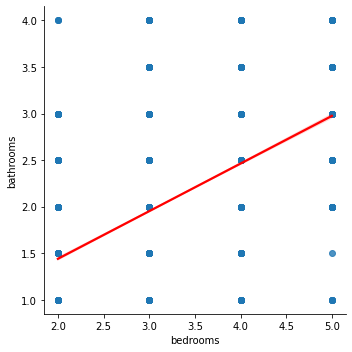

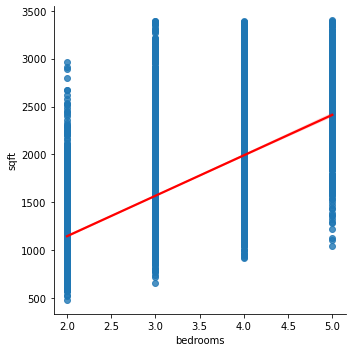

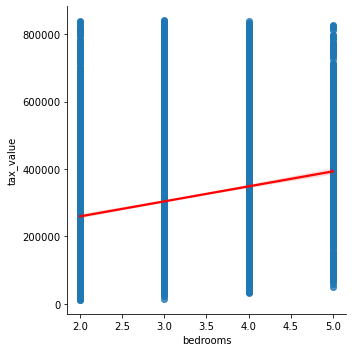

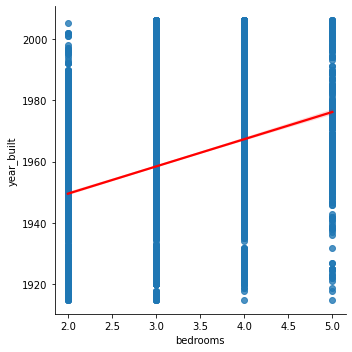

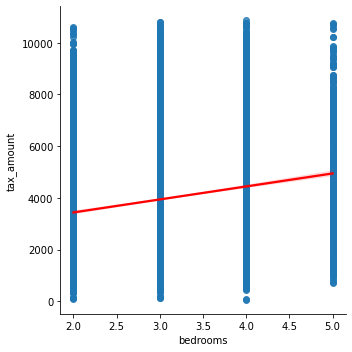

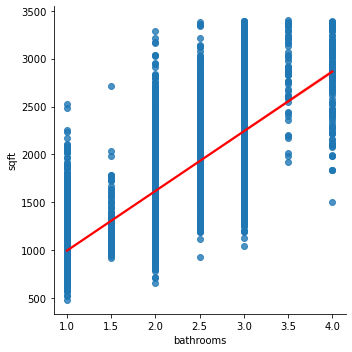

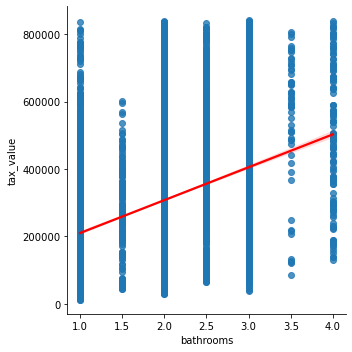

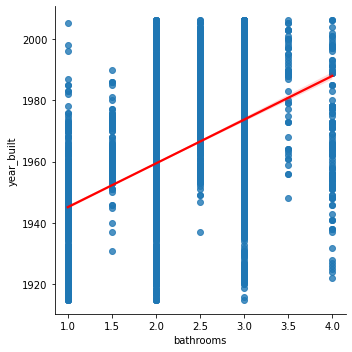

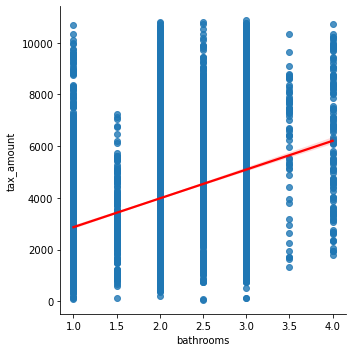

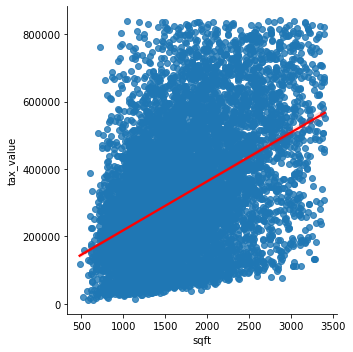

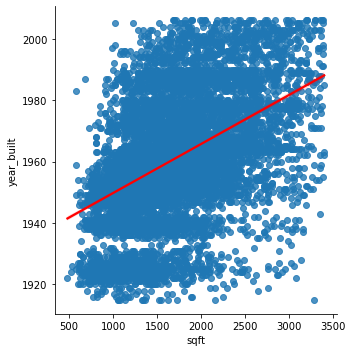

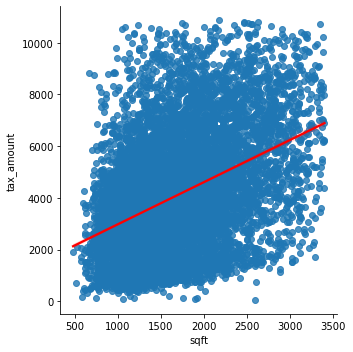

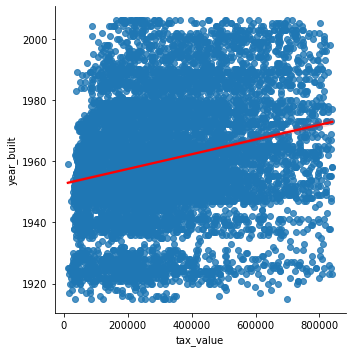

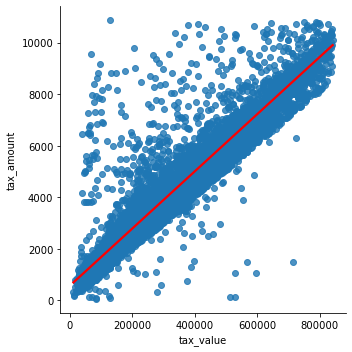

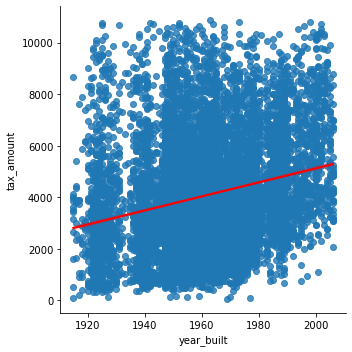

In [8]:
explore.plot_variable_pairs(train_sample)

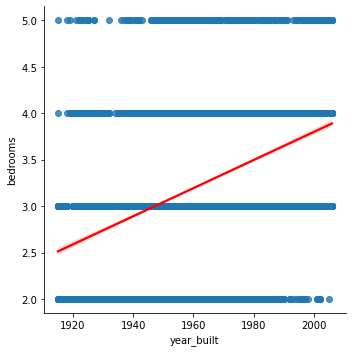

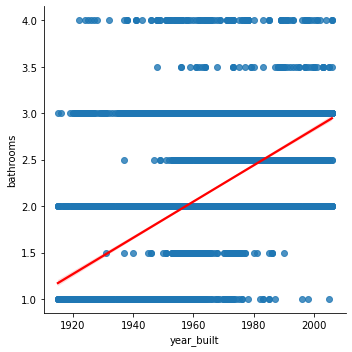

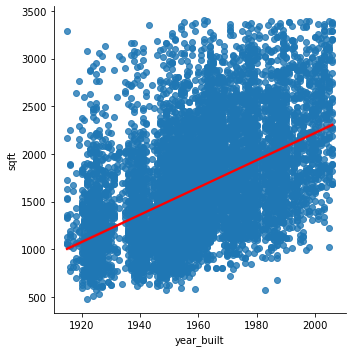

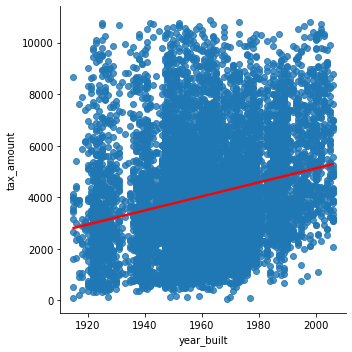

In [9]:
# see change in features over time
for feature in quant_features:
    if feature!= 'year_built':
        sns.lmplot(x='year_built', y=feature, data=train_sample, line_kws={'color': 'red'})
        plt.show()

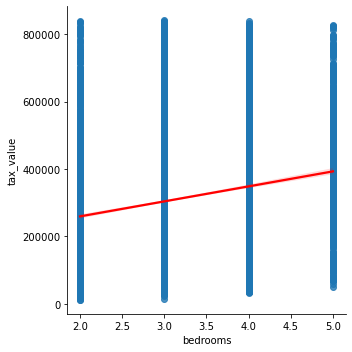

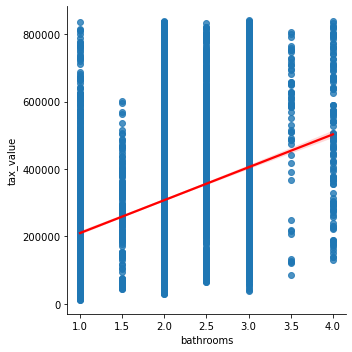

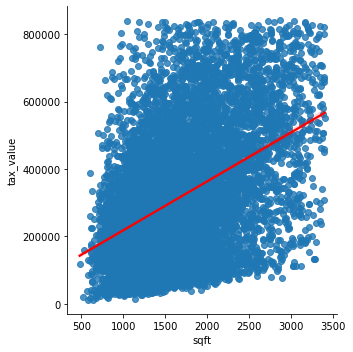

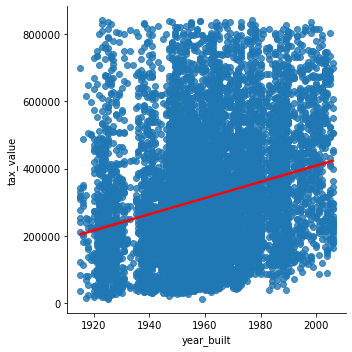

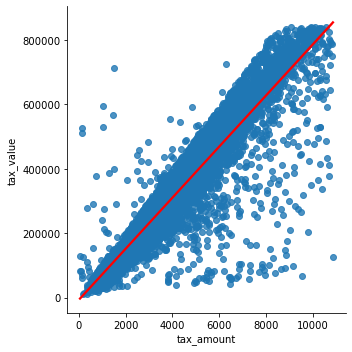

In [10]:
# see effects of each quant variable on target

for feature in quant_features:
        sns.lmplot(x=feature, y=target, data=train_sample, line_kws={'color': 'red'})
        plt.show()

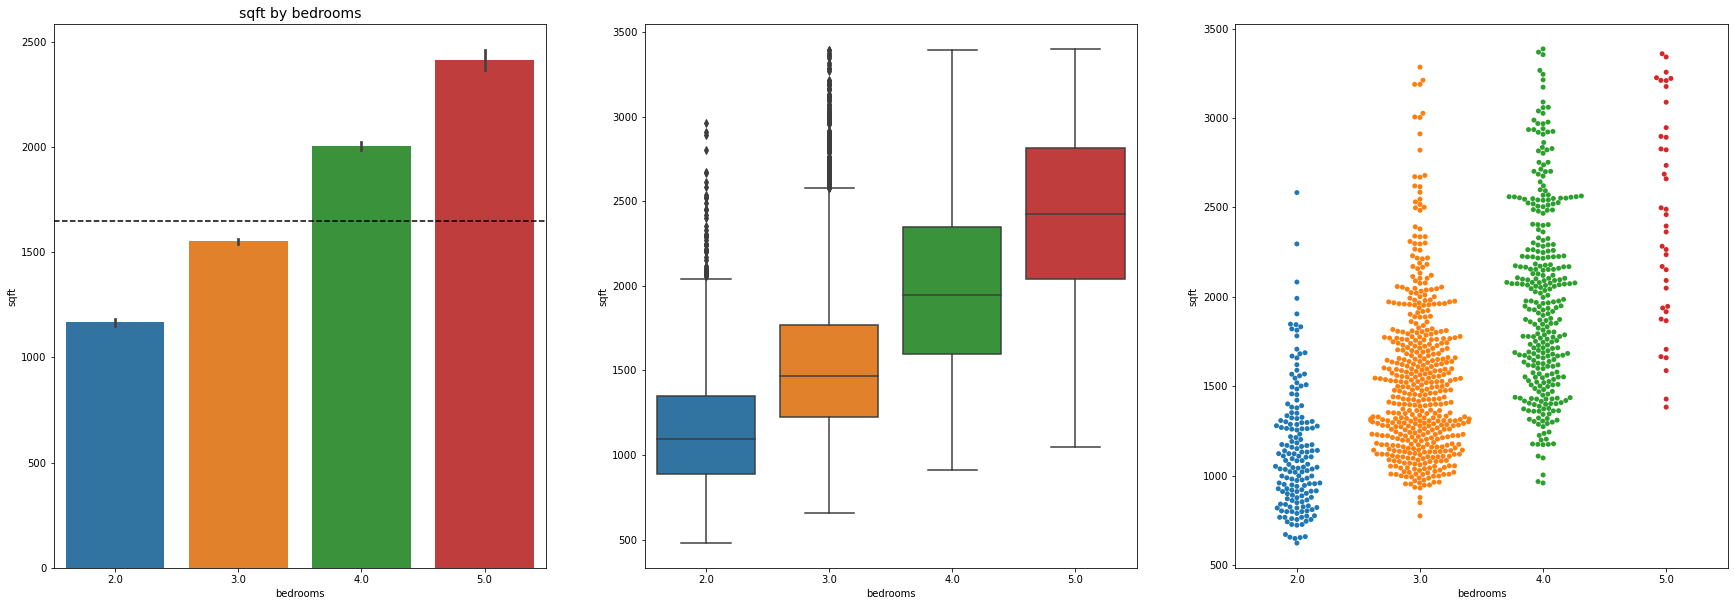

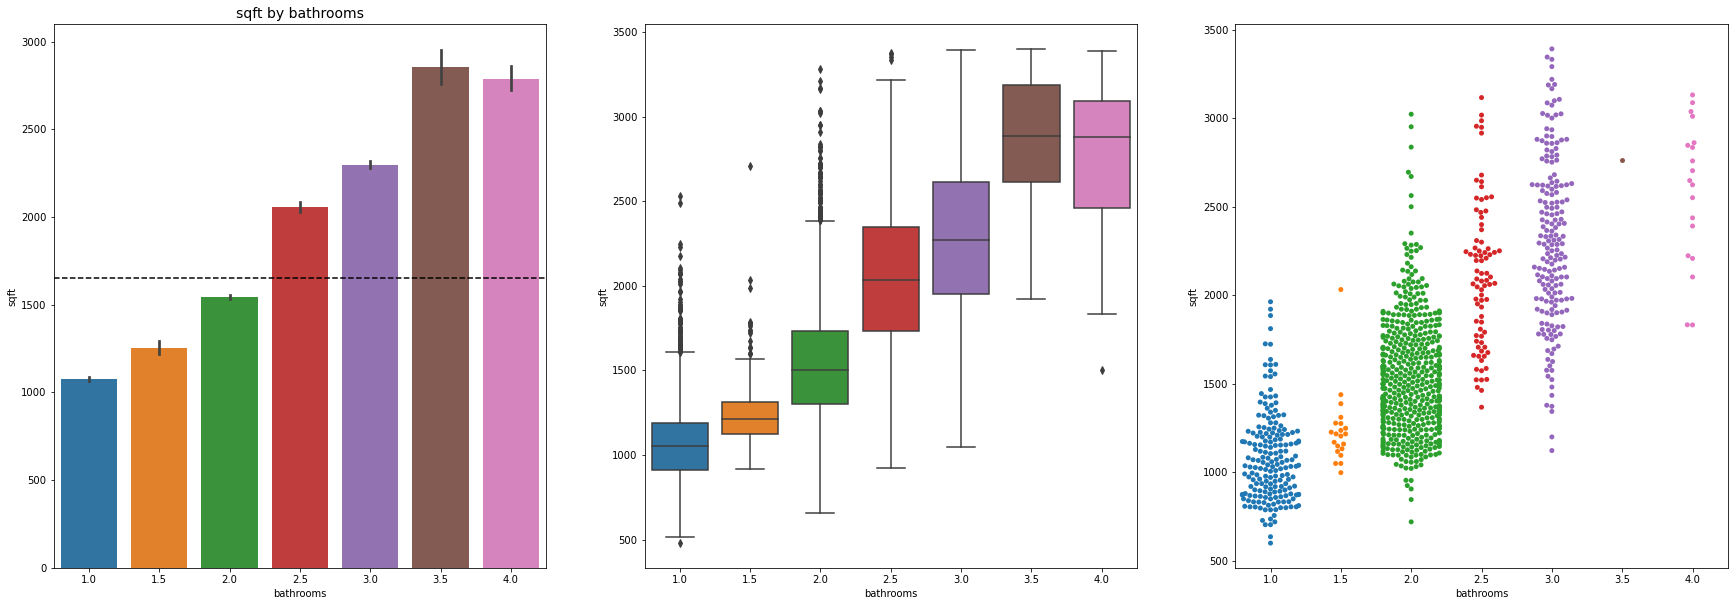

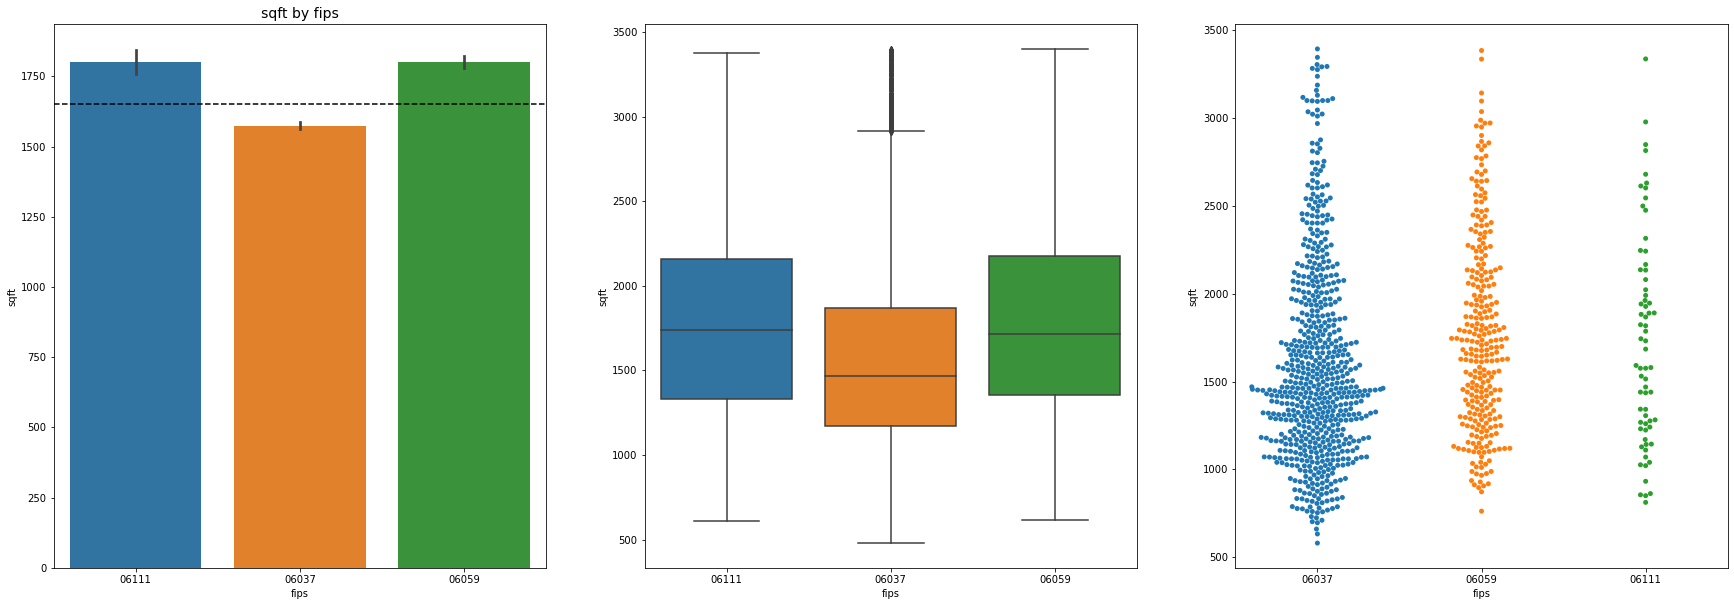

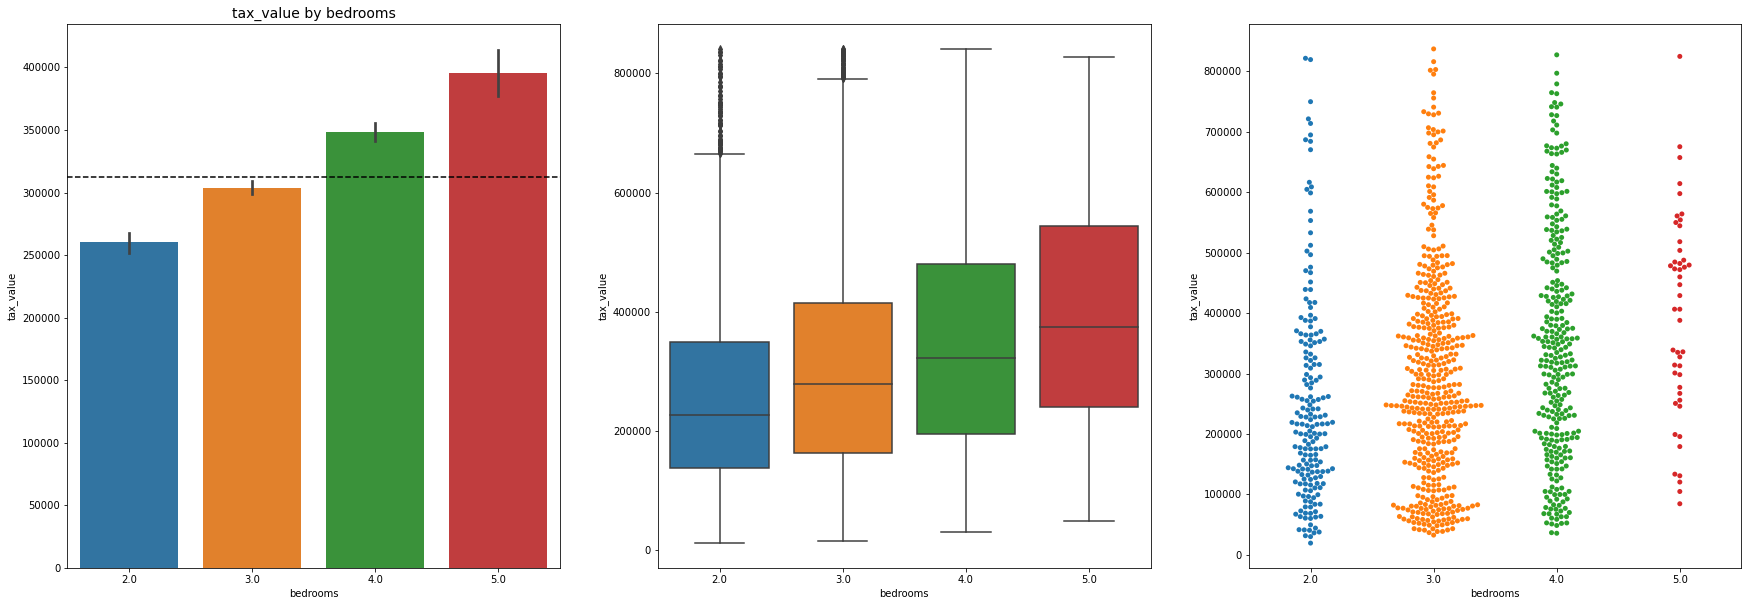

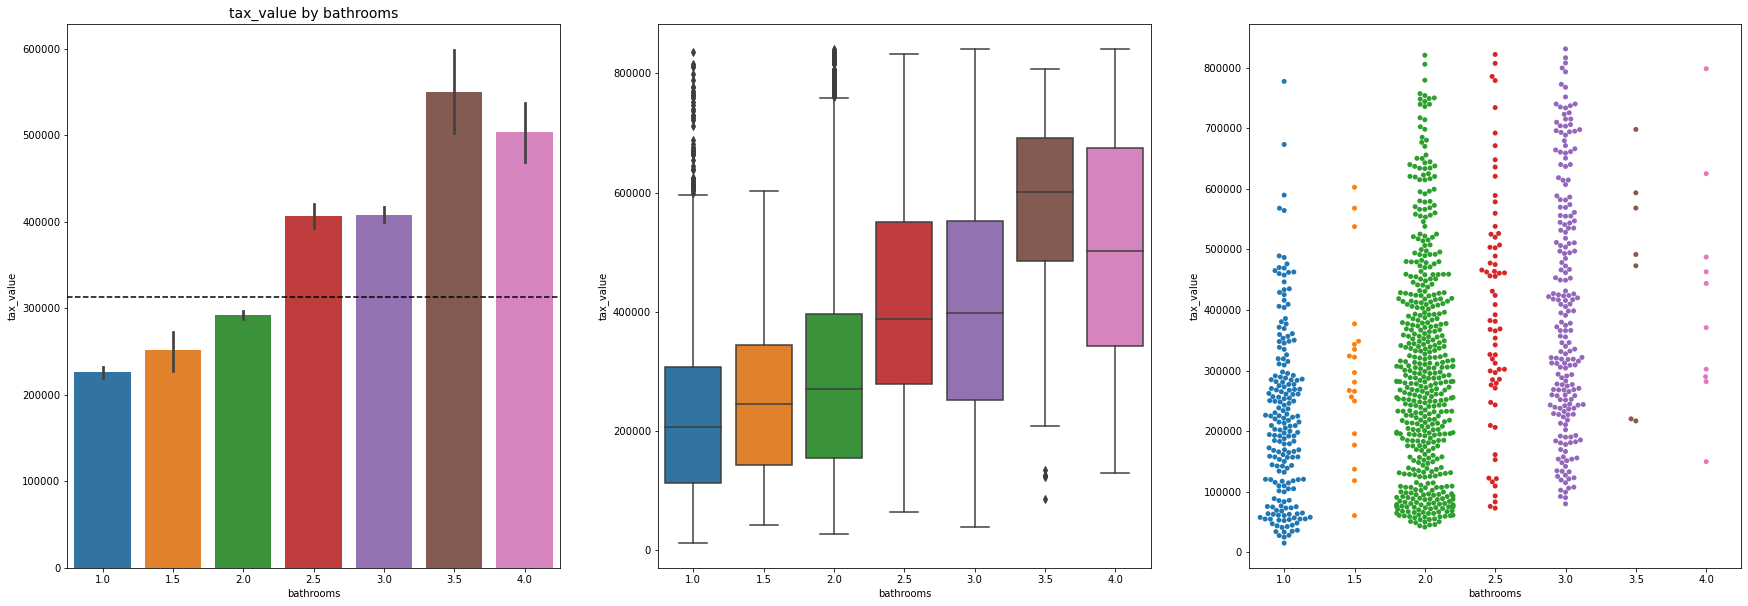

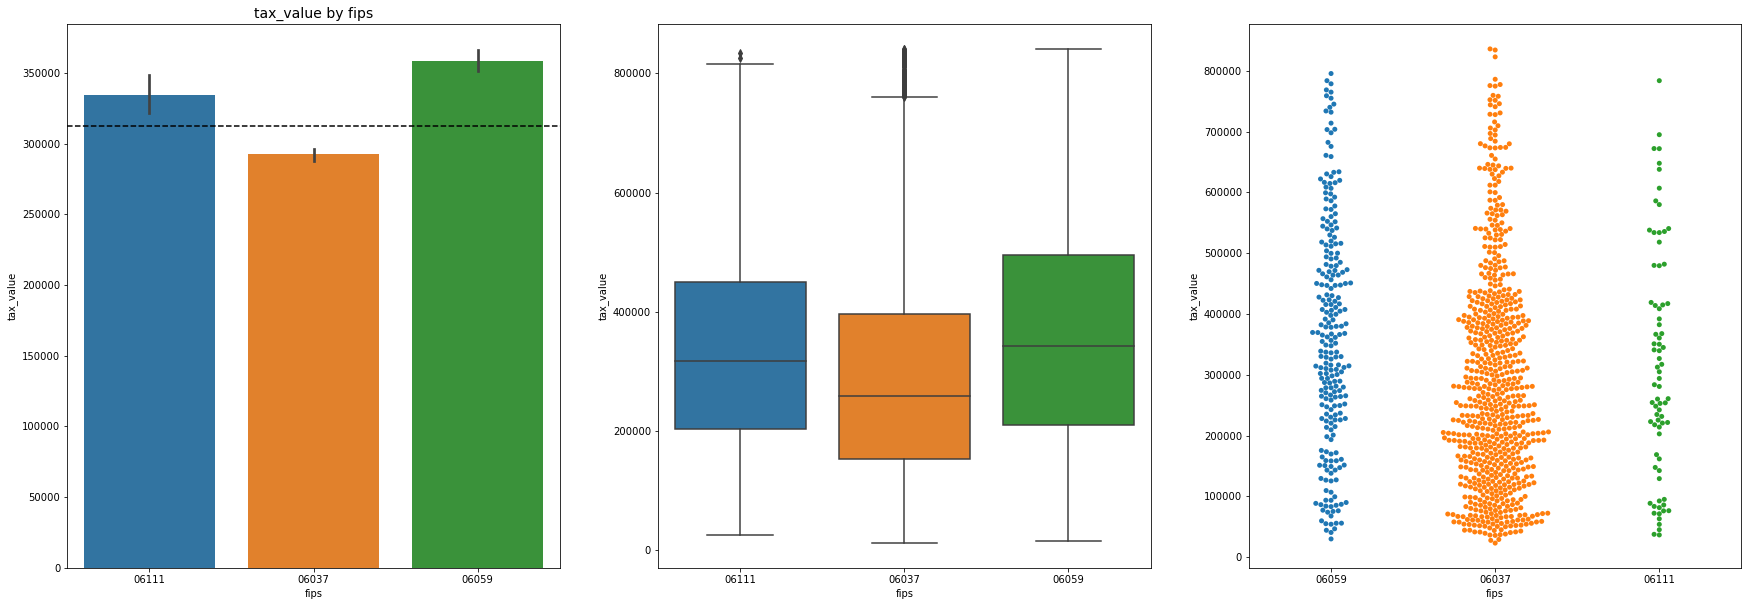

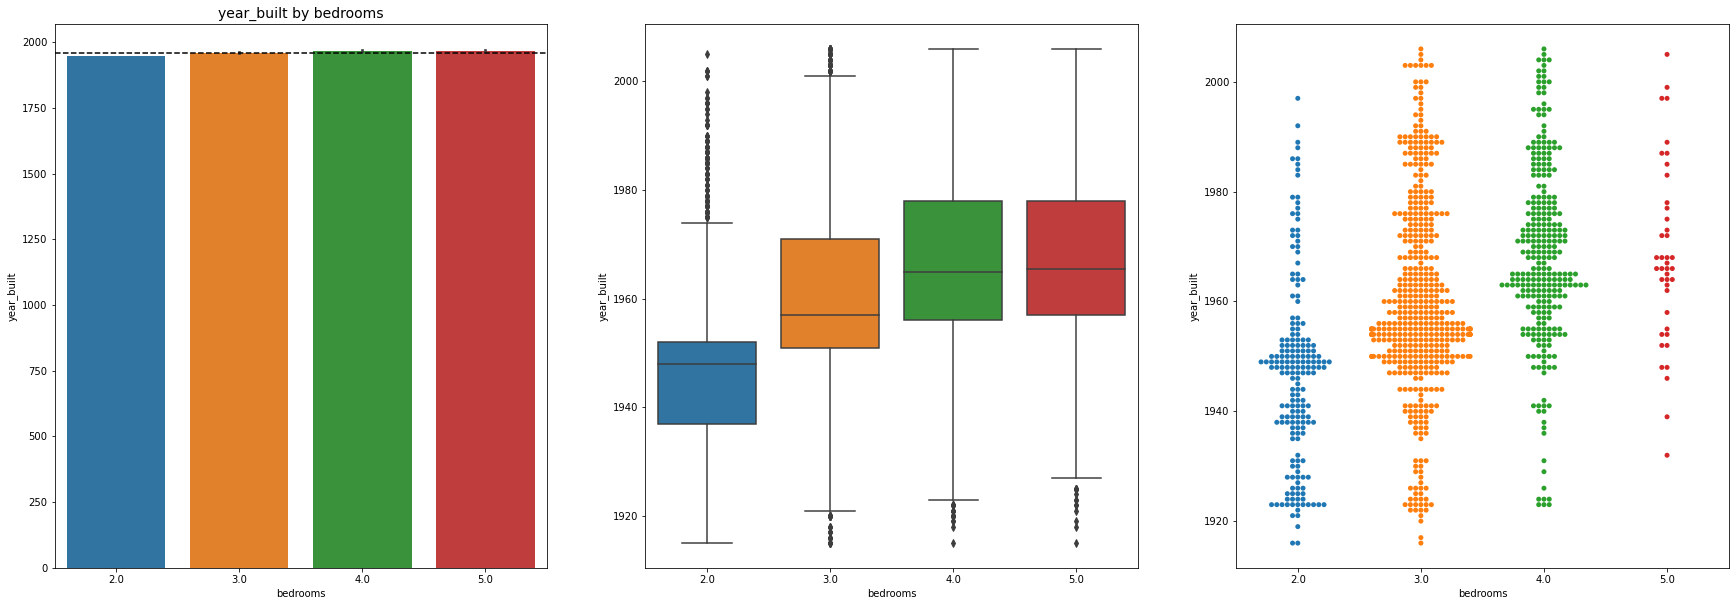

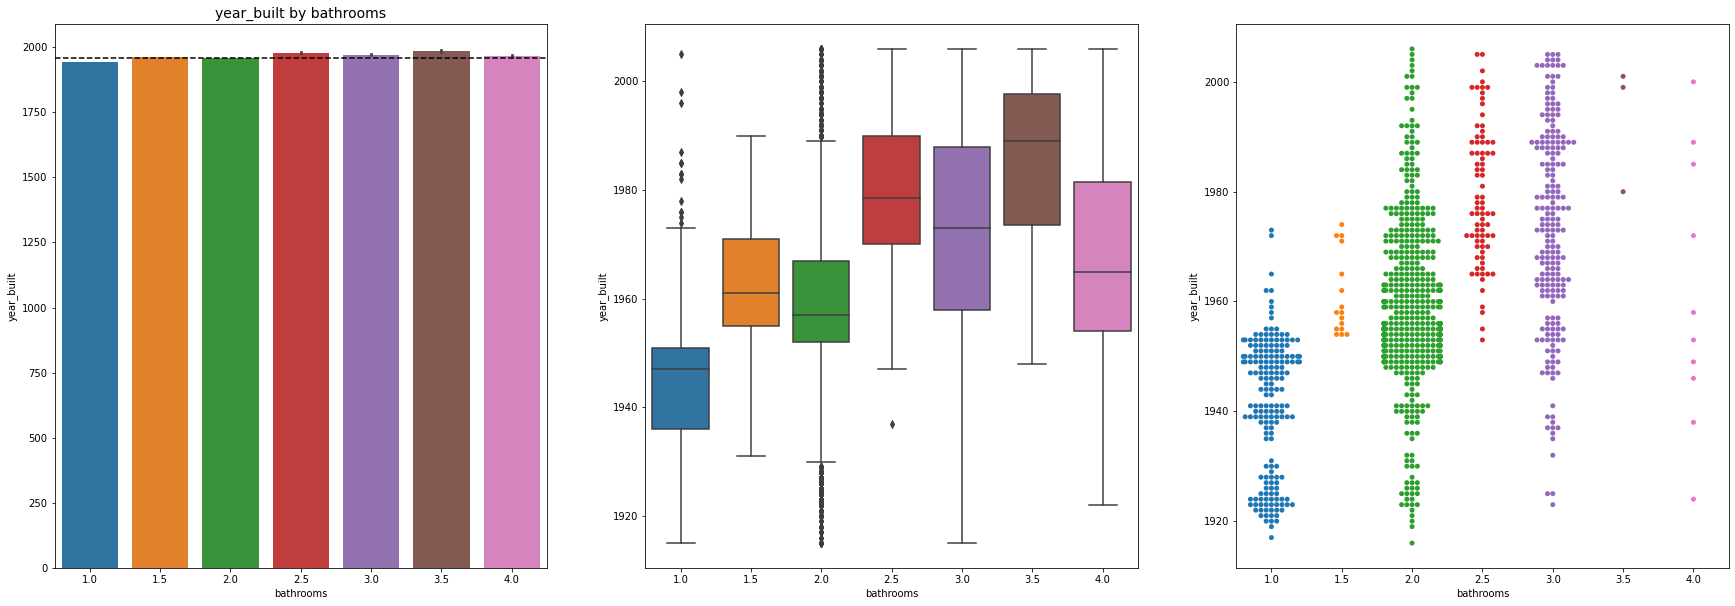

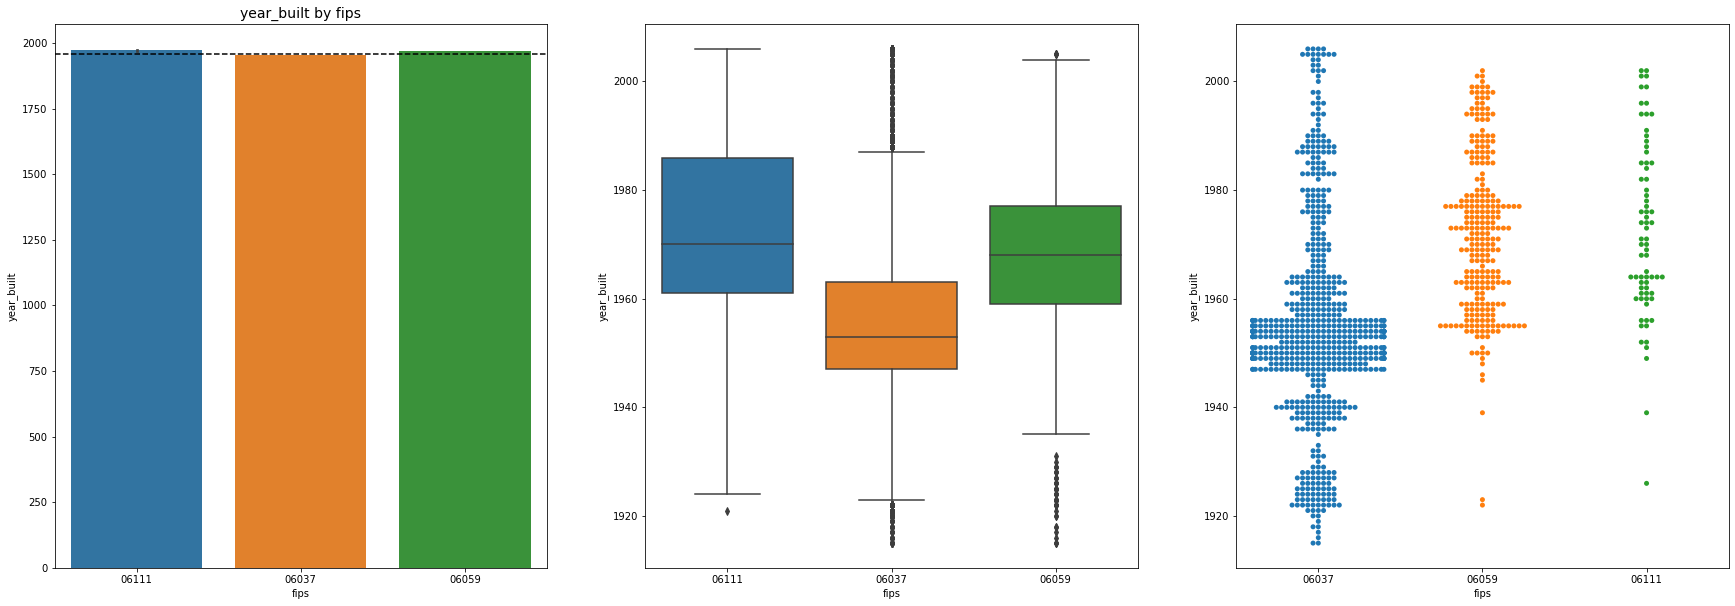

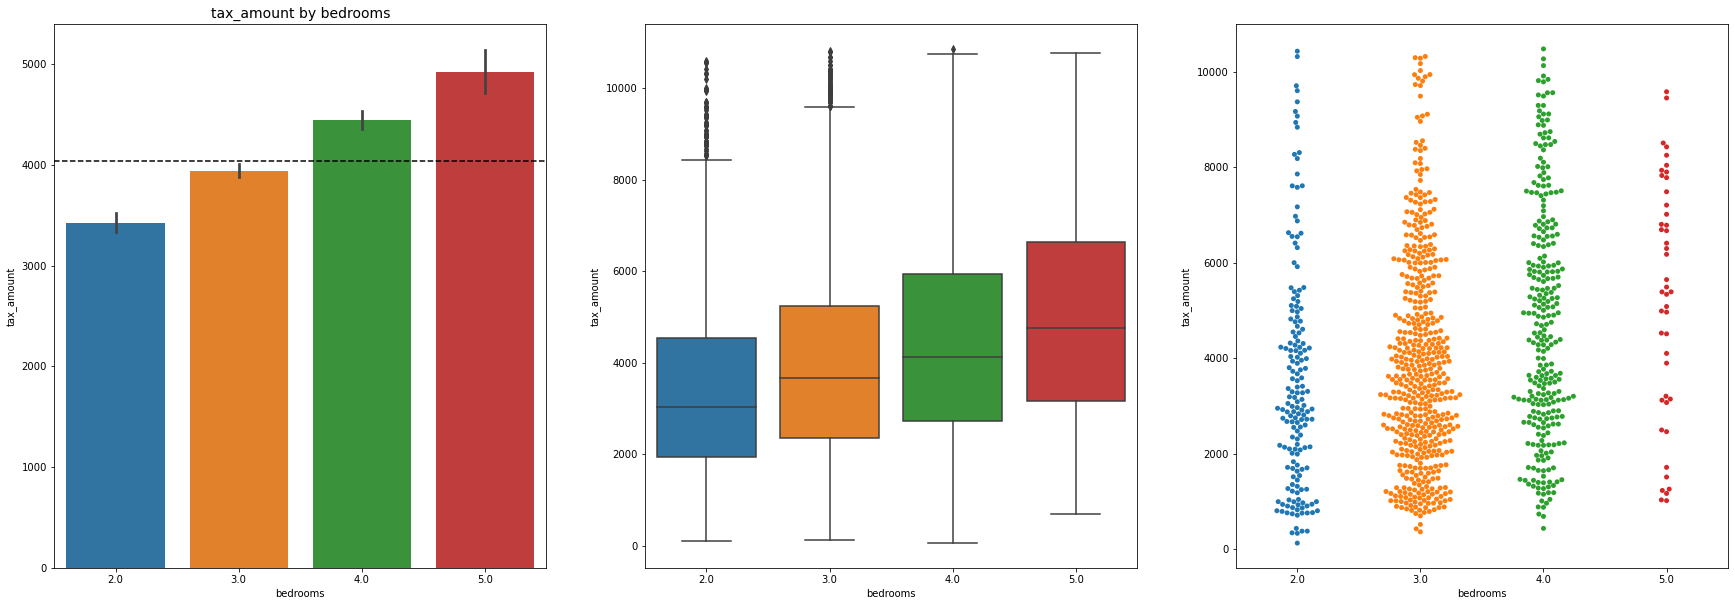

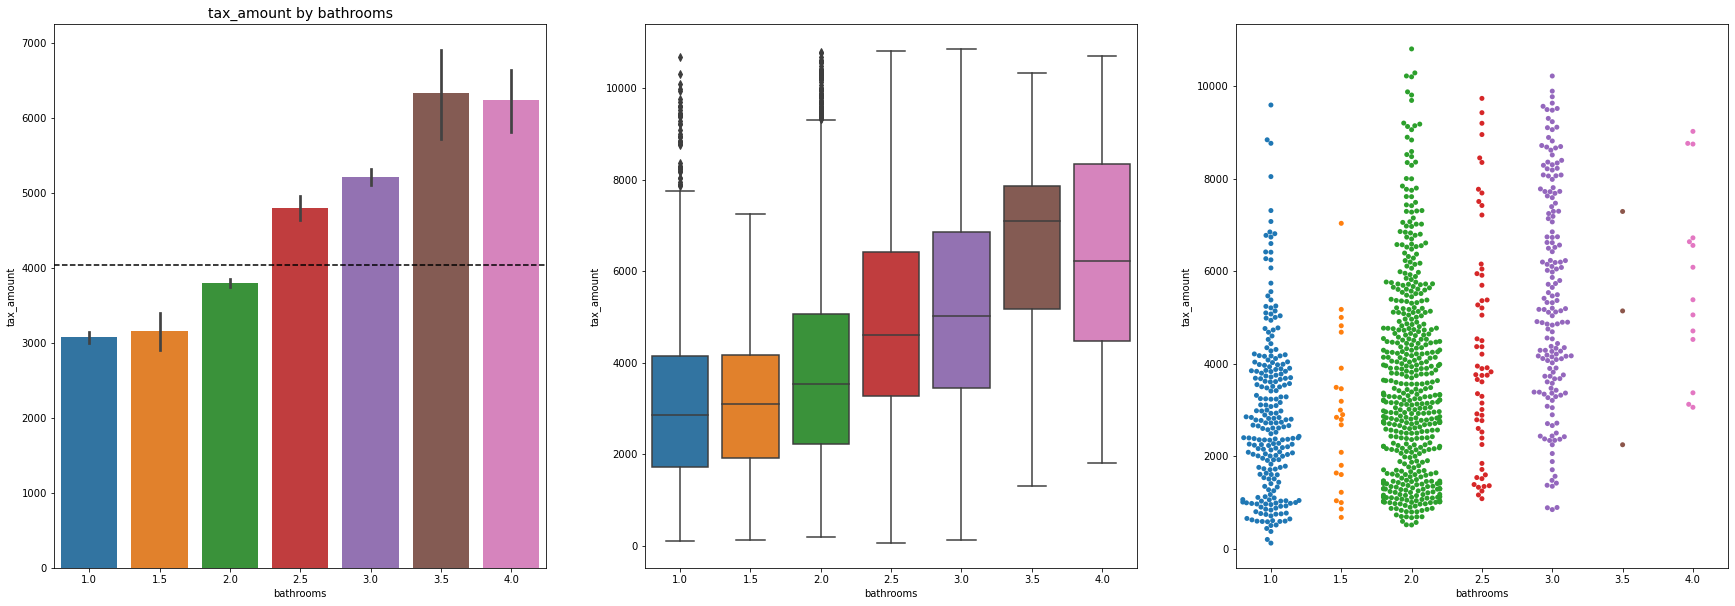

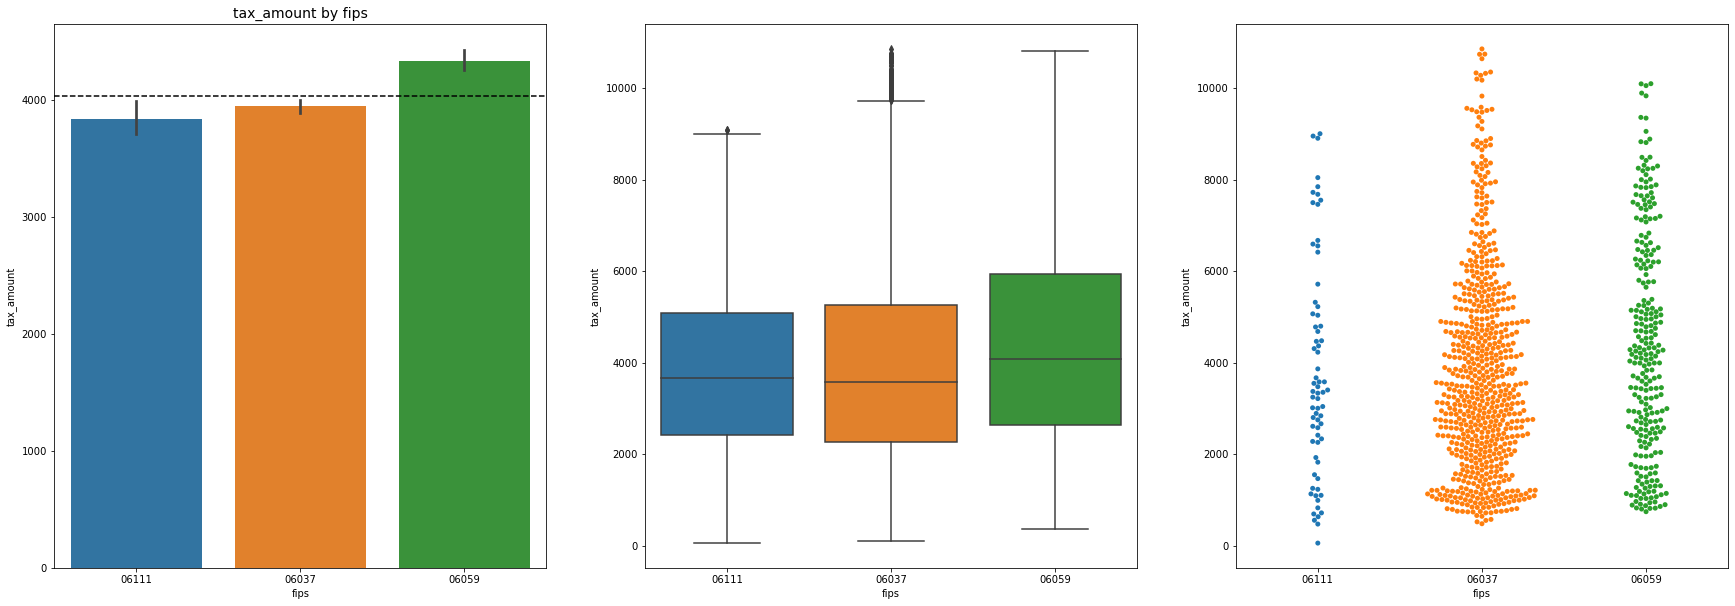

In [11]:
categ_vars = [col for col in train.columns if (train[col].dtype == 'object') or (len(train[col].unique()) < 10)]
cont_vars = [col for col in train.columns if (col not in categ_vars)]
explore.plot_categorical_and_continuous_vars(train_sample, categ_vars, cont_vars)

#### Come up with some initial hypotheses based on your goal of predicting property value.


Property values are significantly different among the different geographic locations (fips). 

Property values have a strong positive correlation with sqft. 

Property values have a positive correlation with bedrooms. 

Property values have a positive correlation with bathrooms. 

Property values have a positive correlation with year_built. 


#### Visualize all combinations of variables in some way.


In [12]:
train_sample_2 = train.sample(1000)

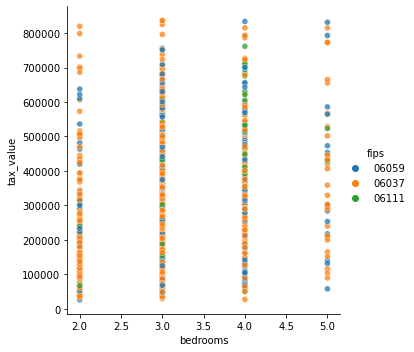

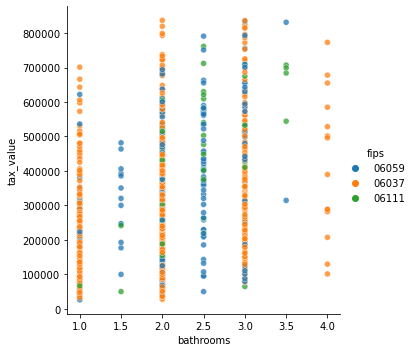

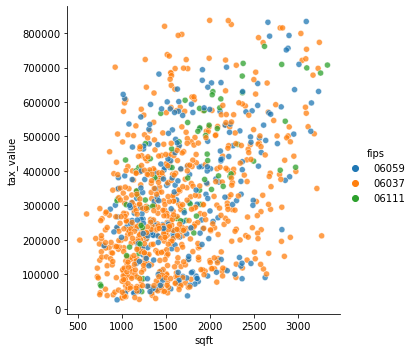

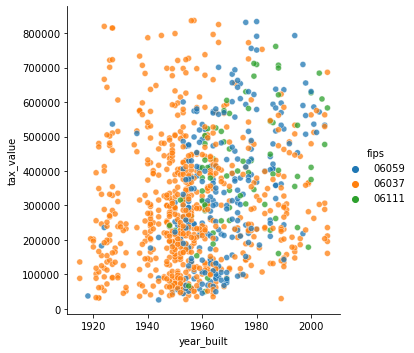

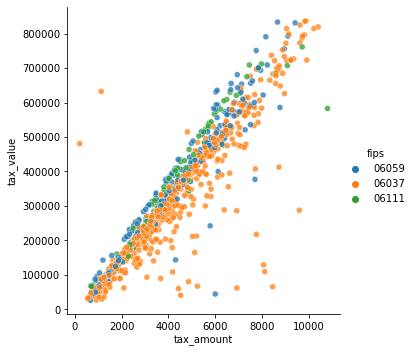

In [13]:
for feature in quant_features:
    sns.relplot(x=feature, y=target, hue='fips', data=train_sample_2, alpha=.75)
    plt.show()

#### What independent variables are correlated with the dependent variable, home value?


In [14]:
train.corr()[['tax_value']].sort_values(by='tax_value', ascending=False).rename(columns={'tax_value':'correlation with target'})

,correlation with target
tax_value,1.000000
tax_amount,0.935464
sqft,0.423596
bathrooms,0.352504
year_built,0.242165
bedrooms,0.198547


#### Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?


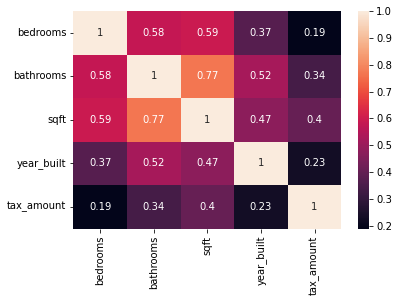

In [15]:
sns.heatmap(train.drop(columns=target).corr(), annot=True)
plt.show()